# Farkli Tahmin Stratejileri

In [1]:
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(24)
X = np.random.randn(100, 1)
y = (X**2 + np.random.randn(100, 1) * 0.5).ravel()


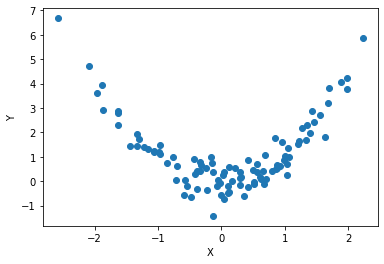

In [3]:
plt.scatter(X, y);
plt.xlabel('X');
plt.ylabel('Y');

Yukaridaki sentetik datasete basit bir kNN modeli uyduralim.

In [4]:
model = neighbors.KNeighborsRegressor(n_neighbors=5)
model.fit(X, y)
model.score(X, y)

0.8682276057766055

Mevcut model, en yakin 5 ornegi bulup bunlarin `y` degerlerinin ortalamasini aliyor. 


In [5]:
y[model.kneighbors(X[0:5])[1]].mean(axis=1)

array([1.96356531, 0.3712772 , 0.4055632 , 1.25671359, 1.22512398])

`predict` metodu ile dogrulayalim:

In [6]:
model.predict(X[0:5])

array([1.96356531, 0.3712772 , 0.4055632 , 1.25671359, 1.22512398])


Tahmin fonksiyonunu degistirmemiz mumkun mu?

Ortalama yerine baska bir istatistik verebilir miyiz?

Bu amacla var olan `KNeighborsRegressor` class'ini kullanabilir miyiz?

In [10]:
class OzelKNN(neighbors.KNeighborsRegressor):
    pass

Hic bir degisiklik yapmadan `neighbors.KNeighborsRegressor` sinifinin bir cocugunu olusturdugumuzda, bu sinifin davranislari tamamen kopyalanacak.

In [11]:
o = OzelKNN(5)
o.fit(X, y)
o.score(X, y)

0.8682276057766055

In [12]:
o.predict(X[0:5])

array([1.96356531, 0.3712772 , 0.4055632 , 1.25671359, 1.22512398])

Elde edilen skorun ilk model ile tamamen ayni olduguna dikkat ediniz. Cunku kullanilan class tamamen ayni.

- Inheritance kullandik.
- Yeni classimiz, `KNeighborsRegressor` sinifinin tum metodlarina ve attribute'lerine sahip.
    - Calisma sistemi tamamen ayni.

### Tahmin fonksiyonunu degistirmek

Tahmin fonksiyonunu ortalama yerine medyanla degistirmek istedigimizi varsayalim.

`KNeighborsRegressor` sinifinin `.kneighbors()` metodunu kullanarak en yakin komsulari bulabiliriz.

In [13]:
yeni_ornekler = X[:5]

In [14]:
mesafeler, indeksler = model.kneighbors(yeni_ornekler)

In [15]:
indeksler

array([[ 0, 85, 22, 40, 99],
       [ 1, 60, 88, 78, 38],
       [ 2, 54, 73, 30, 49],
       [ 3, 87, 92, 65,  4],
       [ 4, 65,  3, 68, 87]], dtype=int64)

Elde ettigimiz indeksler, X'de her bir ornege en yakin komsularin indeks numaralari.

Mevcut KNN modelimiz, bu indekslerdeki y degerlerini cekip ortalamasini aliyor:

In [16]:
y[indeksler]

array([[ 1.70254761,  2.30571029,  1.97452525,  2.16473375,  1.67030964],
       [ 1.01380474,  0.04950388,  0.61500395,  0.74291802, -0.56484461],
       [ 0.65230029,  0.43490498,  0.80547861,  0.43391092, -0.29877881],
       [ 1.21529782,  1.12312744,  1.48666437,  1.20924089,  1.24923741],
       [ 1.24923741,  1.20924089,  1.21529782,  1.32871633,  1.12312744]])

In [17]:
y[indeksler].mean(axis=1)

array([1.96356531, 0.3712772 , 0.4055632 , 1.25671359, 1.22512398])

Yukaridaki sayilarin, `predict` metodu ile elde edilenlerle ayni olduguna dikkat ediniz:

In [18]:
model.predict(yeni_ornekler)

array([1.96356531, 0.3712772 , 0.4055632 , 1.25671359, 1.22512398])

#### `predict` metodunu overload etmek

`KNeighborsRegressor` sinifi, mesafe agacini olsuturmak, en yakin komsulari getirmek gibi isimize yarayacak pek cok seyi zaten yapiyor. Tek degistirmemiz gereken, `predict` metodunu overload etmek.

In [19]:
class MedianKNN(neighbors.KNeighborsRegressor):
    def predict(self, X):
        mesafeler, indeksler = self.kneighbors(X)
        return np.median(self._y[indeksler], axis=1)

In [20]:
medianknn = MedianKNN(5)
medianknn.fit(X, y)
medianknn.score(X, y)

0.8523760261809843

In [21]:
medianknn.predict(X[0:5])

array([1.97452525, 0.61500395, 0.43490498, 1.21529782, 1.21529782])

Yalnizca `predict` metodunu degistirerek, tahmin fonksiyonumuzu ortalamadan medyana degistirebildik.

## Soru:

Lokal olarak agirliklandirilmis lineer regresyon implementasyonunu yapiniz.

Bu uygulamada yapmamiz gereken:
- Verilen sorgu noktasina en yakin `k` komsuyu bulup bunlar icin bir `LinearRegression` modeli egitmek,
- Sadece `k` komsu kullanilarak egitilmis `LinearRegression` modelini kullanarak sorgu noktasi icin tahmin yapmak.


Ipuclari:
- `KNeighborsRegressor` sinifini kullaniniz.
- Verilen bir noktanin en yakin `k` komsusunun indekslerini getirmek icin `.kneighbors()` metodunu kullaniniz.
- Modelin fit edildigi orneklere erismek icin:
    - Feature'lara erismek icin `._fit_X` attribute'ini kullaniniz.
    - Hedef degiskene erismek icin `._y` attribute'ini kullaniniz.

In [53]:
model._fit_X[:4]

array([[ 1.32921217],
       [-0.77003345],
       [-0.31628036],
       [-0.99081039]])

In [54]:
model._y[:4]

array([1.70254761, 1.01380474, 0.65230029, 1.21529782])

In [55]:
class LocallyWeightedRegressor:
    # Kodunuzu buraya yaziniz.
    # 1) Dogru class'i "inherit" ediniz.
    # 2) Dogru metodu "override" ediniz.
    pass